In [19]:
import pandas as pd
traf = pd.read_csv('Forbes-Project.csv')
TMC = pd.read_csv('TMC_Identification_REVISED.csv')

In [20]:
traf = traf.loc[traf.confidence_score >= 30 , :]
forbes= TMC.loc[TMC.road == 'FORBES AVE',:]
EST = forbes.loc[forbes.direction == 'EASTBOUND',:]

In [21]:
traf.rename(columns={'tmc_code':'tmc'}, inplace = True)

In [22]:
main = pd.merge(EST,traf,on= 'tmc', how = 'inner')

In [23]:
main.rename(columns={'measurement_tstamp':'Date'}, inplace=True)
import datetime as dt
main['Date'] = pd.to_datetime(main['Date'])

The day of the week is found and the speed is then average over 1 Hour for weekends and weekday for different period.

In [24]:
main['Weekday'] = main['Date'].dt.dayofweek

In [25]:
 WE = main.loc[main.Weekday == 0,:]

In [26]:
 WD = main.loc[main.Weekday != 0,:]

In [27]:
WE = WE.groupby(pd.Grouper(key = 'Date',freq = '1H')).mean()
WD = WD.groupby(pd.Grouper(key = 'Date',freq = '1H')).mean()

In [28]:
WE = WE.reset_index()
WD = WD.reset_index()

In [29]:
import datetime
t1 = pd.to_datetime('3-7-2018')
t2 = pd.to_datetime('5-21-2018')
t3 = pd.to_datetime('8-14-2018')
t4 = pd.to_datetime('3-22-2019')
t5 = pd.to_datetime('04-06-2019')

In [30]:
traf1= WE[WE["Date"].between(t1,t2)]
traf2 = WE[WE["Date"].between(t2,t3)]
traf3 = WE[WE['Date'].between(t3,t4)]
traf4 = WE[WE['Date'].between(t4,t5)]
traf5=  WD[WD["Date"].between(t1,t2)]
traf6 = WD[WD["Date"].between(t2,t3)]
traf7 = WD[WD['Date'].between(t3,t4)]
traf8 = WD[WD['Date'].between(t4,t5)]

In [31]:
import datetime as dt
traf1['mins'] = traf1['Date'].dt.time
traf2['mins'] = traf2['Date'].dt.time
traf3['mins'] = traf3['Date'].dt.time
traf4['mins'] = traf4['Date'].dt.time
traf5['mins'] = traf5['Date'].dt.time
traf6['mins'] = traf6['Date'].dt.time
traf7['mins'] = traf7['Date'].dt.time
traf8['mins'] = traf8['Date'].dt.time

C:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

In [32]:
traf1['speed'].mean()

17.508856113971504

In [33]:
avg1 = traf1.groupby('mins').speed.mean()
avg2 = traf2.groupby('mins').speed.mean()
avg3 = traf3.groupby('mins').speed.mean()
avg4 = traf4.groupby('mins').speed.mean()
avg5 = traf5.groupby('mins').speed.mean()
avg6 = traf6.groupby('mins').speed.mean()
avg7 = traf7.groupby('mins').speed.mean()
avg8 = traf8.groupby('mins').speed.mean()

Text(0,0.5,'Speed')

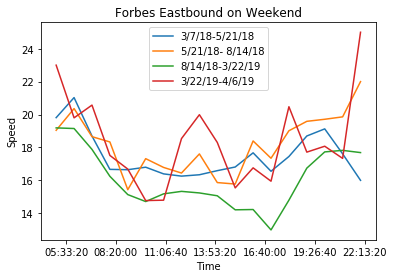

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(avg1, label = '3/7/18-5/21/18' )
plt.plot(avg2 , label = '5/21/18- 8/14/18')
plt.plot(avg3, label = '8/14/18-3/22/19')
plt.plot(avg4,label='3/22/19-4/6/19')
plt.title('Forbes Eastbound on Weekend')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Speed')

Text(0,0.5,'Speed')

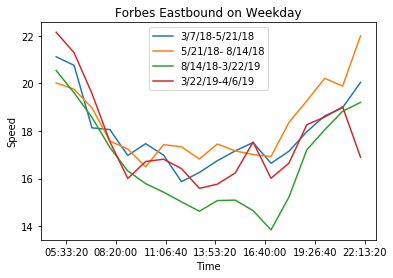

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(avg5, label = '3/7/18-5/21/18' )
plt.plot(avg6 , label = '5/21/18- 8/14/18')
plt.plot(avg7, label = '8/14/18-3/22/19')
plt.plot(avg8,label='3/22/19-4/6/19')
plt.title('Forbes Eastbound on Weekday')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Speed')